# Importing libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
from contextlib import contextmanager
from scipy.sparse import csr_matrix

# Importing dataset

In [2]:
books = pd.read_csv('books.csv', error_bad_lines = False)
books.columns=['ISBN','booktitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
users=pd.read_csv('Users.csv', error_bad_lines = False)
users.columns=['userID','Location','Age']
ratings=pd.read_csv('Ratings.csv', error_bad_lines = False)
ratings.columns=['userID','ISBN','bookRating']

In [4]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'booktitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


# extracting unique years

In [5]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

# removing redundancies


In [6]:
books.loc[books.yearOfPublication == 'DK Publishing Inc']

,ISBN,booktitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [7]:
books.loc[books.ISBN == '078946697X','yearOfPublication']= 2000
books.loc[books.ISBN == '078946697X','bookAuthor']= 'JMichael Teitelbaum'
books.loc[books.ISBN == '078946697X','publisher']= 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','booktitle']= 'DK Readers: Creating the X-Men, How It All Beg...'

In [8]:
books.loc[books.ISBN == '0789466953','yearOfPublication']= 2000
books.loc[books.ISBN == '0789466953','bookAuthor']= 'James Buckley'
books.loc[books.ISBN == '0789466953','publisher']= 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953','booktitle']= 'DK Readers: Creating the X-Men, How Comic Book...'

In [9]:
books.loc[books.yearOfPublication=='Gallimard',:]

,ISBN,booktitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [10]:
books.loc[books.ISBN == '2070426769','yearOfPublication']= 2003
books.loc[books.ISBN == '2070426769','bookAuthor']= 'Jean-Marie Gustave le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','publisher']= 'Gallimard'
books.loc[books.ISBN == '2070426769','booktitle']= 'Peuple du ciel, suivi de Les Bergers'

In [11]:
books.yearOfPublication =pd.to_numeric(books.yearOfPublication,errors='coerce')

In [12]:
print(sorted(books['yearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [13]:
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication ==0), 'yearOfPublication']==np.NAN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace=True)

In [14]:
books.yearOfPublication=books.yearOfPublication.astype(np.int32)

In [15]:
books.loc[(books.ISBN == '193169656X'),'publisher']=='other'
books.loc[(books.ISBN == '1931696993'),'publisher']=='other'

129037    False
Name: publisher, dtype: bool

In [16]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


# cleaning user dataset

In [17]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [18]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [19]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [20]:
users.loc[(users.Age>90) | (users.Age<5),'Age']=np.NAN
users.Age=users.Age.fillna(users.Age.mean())
users.Age=users.Age.astype(np.int32)

In [21]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [22]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


# cleaning ratings dataset

In [23]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


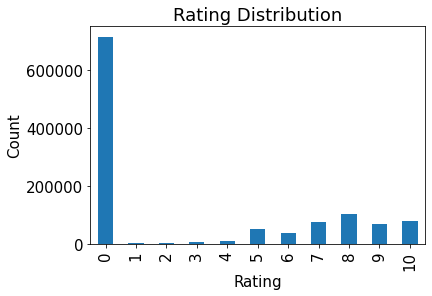

In [24]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot()
plt.savefig("Rating Distribution.jpg",bbox_inches="tight", dpi=100)

In [25]:
n_users=users.shape[0]
n_books=books.shape[0]
print(n_books*n_users)

75670906880


In [26]:
new_ratings=ratings[ratings.ISBN.isin(books.ISBN)]
new_ratings=new_ratings[new_ratings.userID.isin(users.userID)]

In [27]:
print(ratings.shape)
print(new_ratings.shape)

(1149780, 3)
(1031136, 3)


In [28]:
new_ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
sparsity=1.0-len(new_ratings)/float(n_users*n_books)
print("The sparsity level of Book Crossing Dataset is" + str(sparsity*100)+'%')

The sparsity level of Book Crossing Dataset is99.99863734155898%


In [30]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [31]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [32]:
ratings_explicit=new_ratings[new_ratings.bookRating !=0]
ratings_implicit=new_ratings[new_ratings.bookRating ==0]

In [33]:
users_exp_ratings=users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings=users[users.userID.isin(ratings_implicit.userID)]

In [34]:
print(new_ratings.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


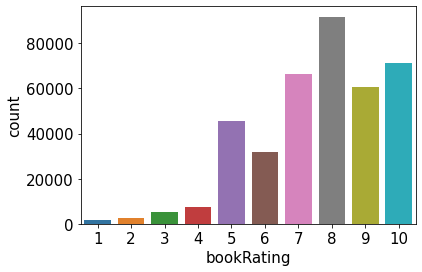

In [35]:
sns.countplot(data=ratings_explicit,x='bookRating')
plt.show()

# top 10 books

In [36]:
ratings_count=pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10=ratings_count.sort_values('bookRating',ascending=False).head(10)
print("Following books are recommended")
top10.merge(books,left_index=True,right_on='ISBN')

Following books are recommended


,bookRating,ISBN,booktitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...


# combining books and ratings dataset

In [37]:
combine_book_rating=pd.merge(books,ratings,on='ISBN')
columns=['bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']

In [38]:
combine_book_rating=combine_book_rating.drop(columns,axis=1)
combine_book_rating.head()

,ISBN,booktitle,userID,bookRating
0,0195153448,Classical Mythology,2,0
1,0002005018,Clara Callan,8,5
2,0002005018,Clara Callan,11400,0
3,0002005018,Clara Callan,11676,8
4,0002005018,Clara Callan,41385,0


In [39]:
combine_book_rating=combine_book_rating.dropna(axis=0,subset=['booktitle'])

In [40]:
book_ratingcount=(combine_book_rating.
                  groupby(by=['booktitle',])['bookRating'].
                  count().
                  reset_index().rename(columns={'bookRating':'TotalRatingCount'})
                  [['booktitle','TotalRatingCount']])

In [41]:
book_ratingcount.head()

,booktitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [42]:
rating_with_totalratingcount=combine_book_rating.merge(book_ratingcount,left_on='booktitle',right_on='booktitle',how='inner')

In [43]:
rating_with_totalratingcount.head()

,ISBN,booktitle,userID,bookRating,TotalRatingCount
0,0195153448,Classical Mythology,2,0,2
1,0801319536,Classical Mythology,269782,7,2
2,0002005018,Clara Callan,8,5,14
3,0002005018,Clara Callan,11400,0,14
4,0002005018,Clara Callan,11676,8,14


In [44]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


In [45]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


In [46]:
popularity_threshold=50
rating_popular_book=rating_with_totalratingcount.query('TotalRatingCount >=@popularity_threshold')

In [47]:
print(rating_with_totalratingcount.shape)
rating_with_totalratingcount.head()

(1031136, 5)


,ISBN,booktitle,userID,bookRating,TotalRatingCount
0,0195153448,Classical Mythology,2,0,2
1,0801319536,Classical Mythology,269782,7,2
2,0002005018,Clara Callan,8,5,14
3,0002005018,Clara Callan,11400,0,14
4,0002005018,Clara Callan,11676,8,14


In [48]:
print(rating_popular_book.shape)
rating_popular_book.head()

(288740, 5)


,ISBN,booktitle,userID,bookRating,TotalRatingCount
31,0399135782,The Kitchen God's Wife,8,0,311
32,0399135782,The Kitchen God's Wife,11676,9,311
33,0399135782,The Kitchen God's Wife,29526,9,311
34,0399135782,The Kitchen God's Wife,36836,0,311
35,0399135782,The Kitchen God's Wife,46398,9,311


In [49]:
combined=rating_popular_book.merge(users,left_on='userID',right_on='userID',how='left')

# picking only us and canada users

In [50]:
us_canada_user_rating=combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()

,ISBN,booktitle,userID,bookRating,TotalRatingCount,Location
0,0399135782,The Kitchen God's Wife,8,0,311,"timmins, ontario, canada"
2,0399135782,The Kitchen God's Wife,29526,9,311,"knoxville, tennessee, usa"
3,0399135782,The Kitchen God's Wife,36836,0,311,"raleigh, north carolina, usa"
4,0399135782,The Kitchen God's Wife,46398,9,311,"san antonio, texas, usa"
5,0399135782,The Kitchen God's Wife,49300,0,311,"loveland, colorado, usa"


In [51]:
if not us_canada_user_rating[us_canada_user_rating.duplicated(['userID','booktitle'])].empty:
    initial_rows =us_canada_user_rating.shape[0]
    print("Initial dataframe shape {0} ".format(us_canada_user_rating.shape))
    us_canada_user_rating=us_canada_user_rating.drop_duplicates(['userID','booktitle'])
    current_rows=us_canada_user_rating.shape[0]
    print("New dataframe shape {0} ".format(us_canada_user_rating.shape))
    print('Removed {0} rows'.format(initial_rows-current_rows))

Initial dataframe shape (251615, 6) 
New dataframe shape (248949, 6) 
Removed 2666 rows


In [52]:
us_canada_user_rating_pivot=us_canada_user_rating.pivot(index='booktitle',columns='userID',values='bookRating').fillna(0)
us_canada_user_rating_matrix=csr_matrix(us_canada_user_rating_pivot.values)

In [53]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

# function to recommend books on a random book

In [54]:
query_index=np.random.choice(us_canada_user_rating_pivot.shape[0])
distances,indices=model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors= 6)
                                      
                                      
for i in range (0,len(distances.flatten())):
                                      if i==0:
                                        print("recommendations for {0}:\n".format(us_canada_user_rating_pivot.index[query_index]))
                                      else:
                                        print("{0}: {1}, with distance of {2}  ".format(i,us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

recommendations for Alias Grace : A Novel:

1: Cat's Eye, with distance of 0.8260300279003001  
2: Surfacing, with distance of 0.8680424862194185  
3: Life Before Man, with distance of 0.8735062217781808  
4: A Portrait of the Artist As a Young Man, with distance of 0.8787773052681679  
5: The Remains of the Day (Vintage International), with distance of 0.8839207778582964  


In [55]:
us_canada_user_rating_pivot2=us_canada_user_rating.pivot(index='userID',columns='booktitle',values='bookRating').fillna(0)

In [56]:
us_canada_user_rating_pivot2.head()

booktitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [57]:
us_canada_user_rating_pivot2.shape

(40017, 2442)

In [58]:
X=us_canada_user_rating_pivot2.values.T
X.shape

(2442, 40017)

In [59]:
from sklearn.decomposition import TruncatedSVD
SVD=TruncatedSVD(n_components=12,random_state=17)
matrix=SVD.fit_transform(X)
matrix.shape

(2442, 12)

In [60]:
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
corr=np.corrcoef(matrix)
corr.shape

(2442, 2442)

# recommending books 

In [61]:
us_canada_book_title=us_canada_user_rating_pivot2.columns
us_canada_book_list=list(us_canada_book_title)
coffey_hands=us_canada_book_list.index("The Green Mile: Coffey's Hands (Green Mile Series)")
print(coffey_hands)

1906


In [62]:
corr_coffey_hands=corr[coffey_hands]
corr_coffey_hands

array([0.14868323, 0.12262568, 0.47013692, ..., 0.64791792, 0.09071632,
       0.06496539])

In [63]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Cold Fire',
 'Needful Things',
 'The Bachman Books: Rage, the Long Walk, Roadwork, the Running Man',
 'The Green Mile: Coffey on the Mile (Green Mile Series)',
 'The Green Mile: Night Journey (Green Mile Series)',
 'The Green Mile: The Bad Death of Eduard Delacroix (Green Mile Series)',
 'The Green Mile: The Mouse on the Mile (Green Mile Series)',
 'The Shining',
 'The Two Dead Girls (Green Mile Series)']